<a href="https://colab.research.google.com/github/mohmmad25-hub/ANN/blob/main/Perceptron_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose an activation function (1: sigmoid, 2: tanh): 2

Epoch 0, Error: [1.70967779]
Epoch 10, Error: [0.17240754]
Epoch 20, Error: [0.08228561]
Epoch 30, Error: [0.05384111]
Epoch 40, Error: [0.03997051]
Epoch 50, Error: [0.03176949]
Epoch 60, Error: [0.02635529]
Epoch 70, Error: [0.02251502]
Epoch 80, Error: [0.01965005]
Epoch 90, Error: [0.01743099]

Final weights: [ 1.92181524 -0.41591975  0.5890101 ]
Final bias: [1.29606595]


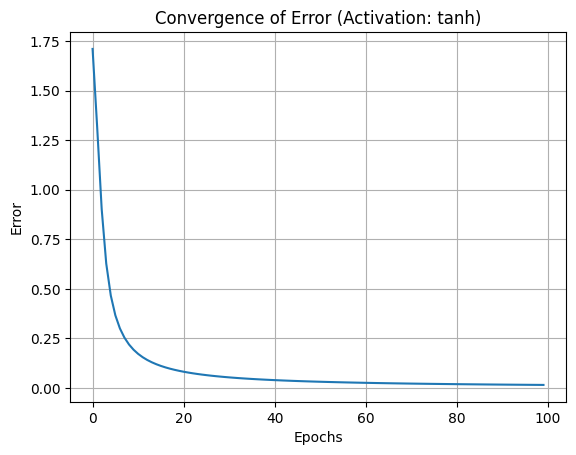

Prediction after training: [0.9843383]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh function
def tanh(x):
    return np.tanh(x)

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)  # Initialize weights randomly
        self.bias = np.random.randn()  # Initialize bias randomly
        self.learning_rate = learning_rate

    def forward(self, inputs, activation_function):
        # Linear combination of inputs and weights
        linear_output = np.dot(inputs, self.weights) + self.bias
        # Apply activation function
        if activation_function == 'sigmoid':
            return sigmoid(linear_output)
        elif activation_function == 'tanh':
            return tanh(linear_output)
        else:
            raise ValueError("Unsupported activation function")

    def train(self, inputs, target, activation_function, epochs=100):
        error_history = []  # Store error history for plotting
        for epoch in range(epochs):
            # Perform forward pass
            output = self.forward(inputs, activation_function)
            # Compute error (difference between target and output)
            error = target - output
            # Store error for plotting
            error_history.append(error)
            # Perform a simple gradient descent update
            self.weights += self.learning_rate * error * inputs
            self.bias += self.learning_rate * error
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Error: {error}")
        return error_history

# User input for activation function
activation_choice = input("Choose an activation function (1: sigmoid, 2: tanh): ").strip()

# Convert the choice to the correct string for the function
activation_functions = {
    '1': 'sigmoid',
    '2': 'tanh'
}

activation_function = activation_functions.get(activation_choice, 'sigmoid')

# Inputs (3 features)
inputs = np.array([1, 0.5, -1])
# Target output
target = np.array([1])  # Binary target output

# Create a perceptron with 3 inputs
perceptron = Perceptron(input_size=3)
print("")
# Train the perceptron and get error history
error_history = perceptron.train(inputs, target, activation_function)

# Print the values of the weights and bias after training
print("")
print(f"Final weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias}")

# Plot the convergence of error with iterations
plt.plot(error_history)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title(f'Convergence of Error (Activation: {activation_function})')
plt.grid(True)
plt.show()

# Make a prediction after training
prediction = perceptron.forward(inputs, activation_function)
print(f"Prediction after training: {prediction}")
